In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, GridSearchCV,RepeatedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
from xgboost import XGBRegressor
import pickle


In [2]:
df = pd.read_csv('cleaned_data_2.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Score_class
0,Wii Sports,12,2006,10,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,1,Average
1,Mario Kart Wii,12,2008,6,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,1,High
2,Wii Sports Resort,12,2009,10,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,1,High
3,New Super Mario Bros.,2,2006,4,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,1,High
4,Wii Play,12,2006,3,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,1,Low


In [4]:
y= df['Critic_Score']
X = df.drop(['Critic_Score','Name','Publisher','Developer','Score_class','Other_Sales'], axis=1)

In [5]:
X

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Count,User_Score,User_Count,Rating
0,12,2006,10,41.36,28.96,3.77,82.53,51.0,8.0,322.0,1
1,12,2008,6,15.68,12.76,3.79,35.52,73.0,8.3,709.0,1
2,12,2009,10,15.61,10.93,3.28,32.77,73.0,8.0,192.0,1
3,2,2006,4,11.28,9.14,6.50,29.80,65.0,8.5,431.0,1
4,12,2006,3,13.96,9.18,2.93,28.92,41.0,6.6,129.0,1
...,...,...,...,...,...,...,...,...,...,...,...
6817,3,2001,0,0.01,0.00,0.00,0.01,4.0,2.4,21.0,1
6818,3,2002,2,0.01,0.00,0.00,0.01,12.0,8.8,9.0,4
6819,5,2014,0,0.00,0.01,0.00,0.01,20.0,7.6,412.0,4
6820,5,2011,8,0.01,0.00,0.00,0.01,12.0,5.8,43.0,6


In [6]:
# Standardizing predictor, X_train, and adding constant term 

X_standard = X.apply(lambda x: (x - x.mean())/x.std())
X_aug = add_constant(X_standard)
y_standard = (y - y.mean())/y.std()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [8]:
print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (5457, 11)
Test shape: (1365, 11)


### MultiLinear Regression + Cross Validation

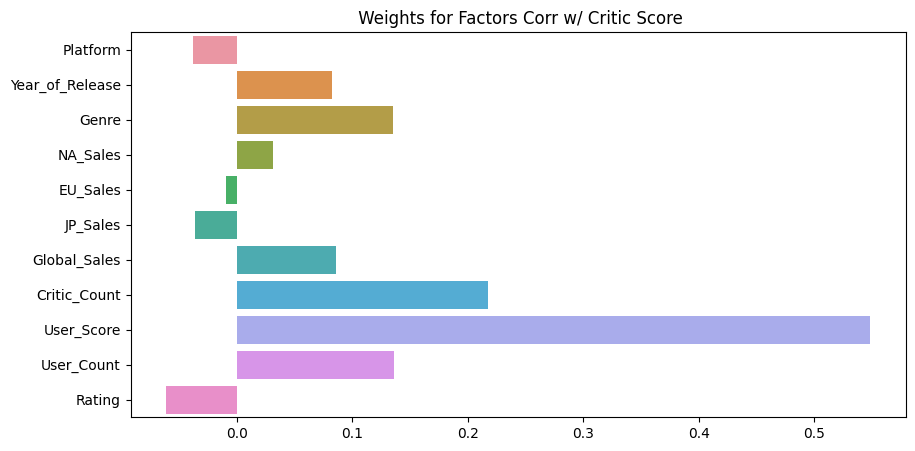

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     578.3
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:23:24   Log-Likelihood:                -7429.5
No. Observations:                6822   AIC:                         1.488e+04
Df Residuals:                    6810   BIC:                         1.496e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.868e-16      0.009  -2.14e-14      1.000      -0.017       0.017
Platform           -0.0373      0.009     -4.026      0.000      -0.056      -0.019
Year_of_Release     0.0829      0.010      8.588      0.000       0.064       0.102
Genre               0.1354      0.009     15.182      0.000       0.118       0.153
NA_Sales            0.0312      0.056      0.560      0.576      -0.078       0.140
EU_Sales           -0.0091      0.042     -0.218      0.828      -0.091       0.073
JP_Sales           -0.0361      0.018     -2.039      0.042      -0.071      -0.001
Global_Sales        0.0861      0.096      0.893      0.372      -0.103       0.275
Critic_Count        0.2180      0.010     21.007      0.000       0.198       0.238
User_Score          0.5485      0.009     58.344      0.000       0.530       0.567
User_Count          0.1365      0.010     13.868      0.000       0.117       0.156
Rating             -0.0611      0.009     -6.714      0.000      -0.079      -0.043
==============================================================================
Omnibus:                      160.942   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.818
Skew:                          -0.318   Prob(JB):                     8.19e-43
Kurtosis:                       3.526   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
res = OLS(y_standard, X_aug).fit()
weights=res.params

plt.figure(figsize=(10,5))
sns.barplot(y=weights[1:].index, x=weights[1:].values)
plt.title(' Weights for Factors Corr w/ Critic Score')
plt.show()
res.summary()

* R-squared/Adj R-sqrd is used to indicate the porportion of variance thats explained by my predictor variables, which in this case 48.3% of Critic Score variance can be explained by dependent var ~ which can suggest that dependent variables are not significantlly improving model. 

In [10]:
# Creating multilinear reg function
def multilinear_regression_model(ind_var, dep_var):
    # Fitting and pred of x,y on linearmodel
    globals() ['mlr'] = LinearRegression().fit(ind_var, dep_var)
    globals() ['yhat_mlr'] = mlr.predict(ind_var)
    globals() ['col_used'] = [ind_var.columns[i] for i, value in enumerate(ind_var.columns)]

    # Printing explained var ~ R-sqrd
    globals() ['r_squared'] = mlr.score(ind_var, dep_var)
    print(f'\n\n\033[1mThe R-Sqaured is: {r_squared}\033[0m')
    print(f'We can say that \033[1m~{round(r_squared*100,2)}%\033[0m of the variation of the {dep_var.name} is explained by the multilinear model')

    #Plot dist of act vs fitted scores
    plt.figure(figsize=(10,5))
    ax1= sns.distplot(dep_var, hist=False, color='r', label = 'Actual Value')
    sns.distplot(yhat_mlr, hist=False, color = 'blue', label='Predicted Values', ax=ax1)
    plt.title('Actual v Fitted Values')
    plt.xlabel(dep_var.name.title())
    plt.ylabel('Proportion of Critic Score')
    plt.legend()
    plt.show()
    plt.close()



The R-Sqaured is: 0.4802082929166077
We can say that ~48.02% of the variation of the Critic_Score is explained by the multilinear model


/var/folders/18/920vt1r90t39q35zb6glj_6h0000gn/T/ipykernel_5792/2827502554.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(dep_var, hist=False, color='r', label = 'Actual Value')
/var/folders/18/920vt1r90t39q35zb6glj_6h0000gn/T/ipykernel_5792/2827502554.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

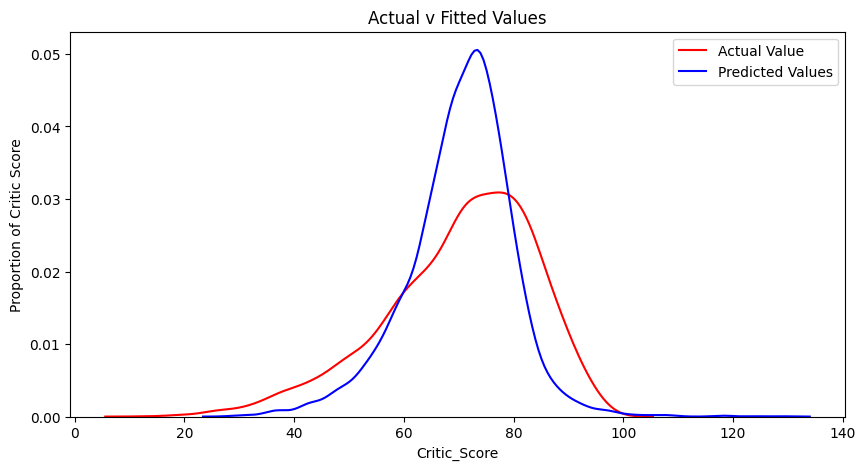

In [11]:
multilinear_regression_model(X_train ,y_train)

In [12]:
## Eval coefficients in df
coeff  = pd.DataFrame()
coeff['Columns'] = X_train.columns
coeff['Linear_Regression_Coeff'] = pd.Series(mlr.coef_)
coeff

,Columns,Linear_Regression_Coeff
0,Platform,-0.104358
1,Year_of_Release,0.281248
2,Genre,0.498299
3,NA_Sales,1.022065
4,EU_Sales,-0.466781
5,JP_Sales,-1.268509
6,Global_Sales,0.290124
7,Critic_Count,0.157364
8,User_Score,5.270409
9,User_Count,0.003179


In [13]:
# Creating multilinear reg function
def cv_multilinear_regression_model(ind_var, dep_var,folds):
    # Fitting and pred of x,y on linearmodel
    globals() ['mlr'] = LinearRegression()
    globals() ['yhat_cv_mlr'] = cross_val_predict(mlr, X_train,y_train, cv=folds)
    globals() ['col_used'] = [ind_var.columns[i] for i, value in enumerate(ind_var.columns)]

    #CV r2 scores
    def get_cv(model, folds):
        globals()['cv_scores'] = cross_val_score(model, X_train, y_train, cv=folds, scoring='r2')
    get_cv(mlr,folds)
    # Printing explained var ~ R-sqrd
    globals() ['cv_r_squared'] = np.mean(cv_scores)
    print(f'\n\n\033[1mThe Cross Validated R-Sqaured is: {cv_r_squared}\033[0m')
    print(f'We can say that \033[1m~{round(cv_r_squared*100,2)}%\033[0m of the variation of the {dep_var.name} is explained by the multilinear model')
    globals()['mse'] = mean_squared_error(y_train, yhat_cv_mlr)
    print(f'\033[1mThe Mean Squared Error of predicted values is: \033[0m',mse)

    #Plot dist of act vs fitted scores
    plt.figure(figsize=(10,5))
    ax1= sns.distplot(dep_var, hist=False, color='r', label = 'Actual Value')
    sns.distplot(yhat_mlr, hist=False, color = 'blue', label='Cross Val Predicted Values', ax=ax1)
    plt.title('Actual v Predicted Values')
    plt.xlabel(dep_var.name.title())
    plt.ylabel('Proportion of Critic Score')
    plt.legend()
    plt.show()
    plt.close()



The Cross Validated R-Sqaured is: 0.4732822396220035
We can say that ~47.33% of the variation of the Critic_Score is explained by the multilinear model
The Mean Squared Error of predicted values is:  100.07632487179922


/var/folders/18/920vt1r90t39q35zb6glj_6h0000gn/T/ipykernel_5792/1288105837.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(dep_var, hist=False, color='r', label = 'Actual Value')
/var/folders/18/920vt1r90t39q35zb6glj_6h0000gn/T/ipykernel_5792/1288105837.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

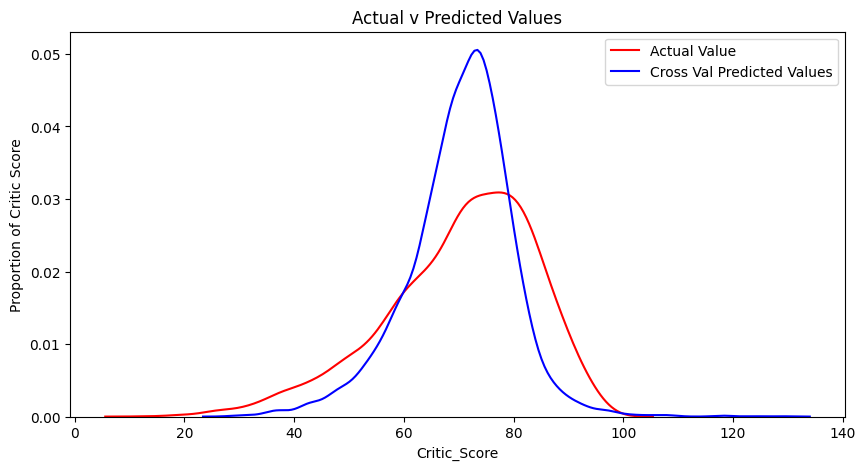

In [14]:
cv_multilinear_regression_model(X_train,y_train,5)

### Lasso Regression GridSearch

In [15]:
param_grid = {'alpha': [0,0.0001,0.001,0.001,0.05,0.1],
              'fit_intercept': [True, False]}

In [16]:
lasso = Lasso(random_state= 42)
lasso_grid= GridSearchCV(lasso, param_grid, scoring = 'r2', verbose =1, n_jobs =-1, cv=20)
lasso_grid_results = lasso_grid.fit(X_train, y_train)
print(f"Best Scores: {lasso_grid_results.best_score_}")
print(f"Best Parameteres: {lasso_grid_results.best_params_}")

Fitting 20 folds for each of 12 candidates, totalling 240 fits


/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_

Best Scores: 0.47146957973771475
Best Parameteres: {'alpha': 0.1, 'fit_intercept': True}


### Random Forest Regressor w/ GridSearchCV

In [17]:
rf_param_grid={
               'max_depth': [15,20],
               'ccp_alpha': [0.0,0.2,0.4],
               'n_estimators':[15,20,25]}

In [18]:
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, scoring = 'r2', verbose=2, n_jobs=-1, cv=50)
rf_grid_results = rf_grid.fit(X_train, y_train)
print(f"Best Random Forest Scores: {rf_grid_results.best_score_}")
print(f'Best Random Forest Params: {rf_grid_results.best_params_}')

Fitting 50 folds for each of 18 candidates, totalling 900 fits
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.4s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.4s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.4s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.4s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.4s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.4s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.4s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.4s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.4s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.4s
[CV] END .......ccp_alpha=0.0, max_depth=15, n_estimators=15; total time=   0.4s
[CV] END .......ccp_alpha=0.0, max_depth=15, n

In [19]:
print(f"Randomized Forest Regressor model's Test score: {round(rf_grid_results.best_estimator_.score(X_test, y_test)*100,2)}")

Randomized Forest Regressor model's Test score: 61.07


### XGBoost Regression 

In [20]:
xgb_params = {'booster': ['gbtree','gblinear','dart'],
               'max_depth':[10,15,20],
              'subsample':[0.1,0.5,1],
              'objective':['reg:squarederror']}

In [21]:
xgb_grid= GridSearchCV(XGBRegressor(random_state=42), xgb_params, scoring = 'r2', n_jobs=-1, cv=5)
xgb_grid_results = xgb_grid.fit(X_train, y_train)
print(f'Best XGB Score:', xgb_grid_results.best_score_)
print(f'Best XGB Params:', xgb_grid_results.best_params_)

[15:25:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[15:25:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[15:25:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[15:25:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[15:25:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_depth", "subsample" } are not used.

[15:25:13] WARNING: 

In [22]:
print(f"XGBRegressor model's Test score: {round(xgb_grid_results.best_estimator_.score(X_test, y_test)*100,2)}")

XGBRegressor model's Test score: 60.79


### Extra Trees Regressor

In [23]:
forest_param_grid = {'n_estimators':[50,100,150],
              'criterion':['squared_error'],
              'ccp_alpha':[0.0,0.2,0.4]}

In [24]:
tree_grid = GridSearchCV(ExtraTreesRegressor(random_state=42), forest_param_grid, scoring = 'r2',verbose =2 , n_jobs=-1, cv=20)
tree_grid_results = tree_grid.fit(X_train, y_train)
print(f"Best Tree Score: {tree_grid_results.best_score_}")
print(f"Best Tree Params: {tree_grid_results.best_params_}")

Fitting 20 folds for each of 9 candidates, totalling 180 fits
[CV] END ccp_alpha=0.0, criterion=squared_error, n_estimators=50; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=squared_error, n_estimators=50; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=squared_error, n_estimators=50; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=squared_error, n_estimators=50; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=squared_error, n_estimators=50; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=squared_error, n_estimators=50; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=squared_error, n_estimators=50; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=squared_error, n_estimators=50; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=squared_error, n_estimators=50; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=squared_error, n_estimators=50; total time=   1.0s
[CV] END ccp_alpha=0.0, criterion=squared_error, n_estimators=50; total time=   1.0s
[CV

In [25]:
print(f"Extra Trees Regressor model on Test Score: {round(tree_grid_results.score(X_test, y_test)*100,2)}")

Extra Trees Regressor model on Test Score: 62.75


### Polynomial + Boosting GridSearch

In [26]:
poly = PolynomialFeatures(degree=2)
gb = GradientBoostingRegressor(learning_rate=0.25, loss='huber', n_estimators=200, random_state=42)

pipe = Pipeline(steps=[('polynomialfeatures', poly), ('gradientboostingregressor', gb)])

In [27]:
# define parameter grid with degree and other parameters for PolynomialFeatures and parameters for GradientBoostingRegressor
poly_param = {'polynomialfeatures__degree': [1, 2, 3],
              'gradientboostingregressor__learning_rate': [0.5, 0.1, 0.25],
              'gradientboostingregressor__n_estimators': [100, 200, 300],
              'gradientboostingregressor__loss': ['squared_error', 'absolute_error', 'huber']}


In [28]:
poly_grid = GridSearchCV(pipe, poly_param, scoring='r2', verbose=1, n_jobs=-1,cv=10)
poly_grid_results = poly_grid.fit(X_train, y_train)
print(f"Best Score: {poly_grid_results.best_score_}")
print(f"Best Params: {poly_grid_results.best_params_}")

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best Score: 0.6231971023379319
Best Params: {'gradientboostingregressor__learning_rate': 0.1, 'gradientboostingregressor__loss': 'squared_error', 'gradientboostingregressor__n_estimators': 300, 'polynomialfeatures__degree': 1}


In [29]:
print(f"Gradient+Polynomial Model's Test score: {round(poly_grid_results.best_estimator_.score(X_test, y_test)*100,2)}")

Gradient+Polynomial Model's Test score: 64.56


### Predictions on Test Set

In [30]:
### Save all models w.function 
def save_fiited_models(X,y):
    #Multilinear
    mlr.fit(X_train, y_train)
    with open ('models/multilinear_regression_model.pk1','wb') as file:
        pickle.dimp(mlr,file)
    mlr_scor= mlr.score(X_test, y_test)
    print(f"Multilinear Regression Model Test Score: {round(mlr_score*100,2)}")
    
    #Lasso 
    lasso = Lasso(**lasso_grid_results.best_params_, random_state=42)
    lasso.fit(X,y)
    with open('models/lasso_regression_model.pk1','wb') as file:
        pickle.dump(lasso, file)
        lasso_score = lasso.score(X_test, y_test)
        print(f"Lasso Regression Model Test Score {round(lasso_score*100,2)}")

     #Random Forest Regression
    rfr = RandomForestRegressor(**rf_grid_results.best_params_, random_state=42)
    rfr.fit(X,y)
    with open("models/random_forest_regression_model.pk1",'wb') as file:
        pickle.dump(rfr, file)
    rfr_score = rfr.score(X_test, y_test)
    print(f"Random Forest Regression Model Test Score: {round(rfr_score*100,2)}")

    #XGBoost Regression
    xgb = xgb_grid_results.best_params_
    xgb.fit(X,y)
    with open("models/xgboost_regression_model.pk1",'wb') as file:
        pickle.dump(xgb, file)
    xgb_score = xgb.score(X_test, y_test)
    print(f"Extreme Gradient Boosting Model Test Score: {round(xgb_score*100,2)}")

    #Tree Regressor
    tr = ExtraTreesRegressor(**tree_grid_results.best_params_, random_state=42)
    tr.fit(X,y)
    with open('models/extra_tree_regressor_model,pk1','wb') as file:
        pickle.dump(tr, file)
    tr_score = tr.score(X_test, y_test)
    print(f"Extra Trees Regression Model Test Score {round(tr_score*100,2)}")

    #Polynomial + Boost
    poly = poly_grid_results.best_estimator_
    poly.fit(X,y)
    with open("models/polynomial_regression_model.pk1", "wb") as file:
        pickle.dump(poly, file)
    poly_score = poly.score(X_test, y_test)
    print(f"Polynomial Boosting Model Test Score: {round(poly_score*100,2)}")


### Load Pickled Model and Display Prediction

In [31]:
def critic_score_pred(game_info):
    #Extract game title
    def titlestr(obj, namespace):
        name = str([name for name in namespace if namespace[name] is obj]).replace("_"," ").title()
        return name[2:-2]
    title = namestr(game_info, globals())

    #Multilinear
    with open ('models/multilinear_regression_model.pk1','rb') as file:
        mlr = pickle.load(file)
    print(f"{title}'s predicted critic score (using Linear Regression) is: {mlr.predict(game_info)}")

    #Lasso 
    with open('models/lasso_regression_model.pk1','rb') as file:
        lasso = pickle.load(file)
        print(f"{title}'s predicted critic score (using Lasso Regression) is:{lasso.predict(game_info)}")

    #Random Forest Regression
    with open("models/random_forest_regression_model.pk1",'rb') as file:
        rfr= pickle.load(file)
    print(f"{title}'s predicted critic score (using Random Forest Regression is:{rfr.predict(game_info)}")

    #XGBoost Regression
    with open("models/xgboost_regression_model.pk1",'rb') as file:
        xgb = pickle.load(file)
    print(f"{title}'s predicted critic score (using XGBoost Regression) is {xgb.predict(game_info)}")

    #Extra Trees Regressor
    with open('models/extra_tree_regressor_model,pk1','rb') as file:
        etr = pickle.load(file)
    print(f"{title}'s predicted critic score(using Extra Trees Regressor)is:{etr.predict(game_info)}")

    #Polynomial
    with open("models/polynomial_regression_model.pk1", "rb") as file:
        poly= pickle.load(file)
    print(f"{title}'s predicged critic score(using Polynomial Regression) is:{poly.predict(game_info)}")
          